In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Carregando os dados de treinamento e teste
train_df = pd.read_csv("train_critic.csv").dropna()  # Carregando dados de treino
train_df = train_df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(1500)).reset_index(drop=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Adjust max_features as needed
reviews = vectorizer.fit_transform(train_df['Review']).toarray()
rating = train_df['Sentiment']

/tmp/ipykernel_59377/3074233845.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(1500)).reset_index(drop=True)


In [2]:
from datasets import Dataset
import tensorflow as tf
import random
import numpy as np
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)


x_train, x_val, y_train, y_val = train_test_split (reviews, rating,test_size = 0.2)



/home/felipedias/BigData/Trabalho1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-23 20:29:27.449317: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 20:29:27.456788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732404567.465402   59377 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732404567.467912   59377 cuda_bla

## Modelo Base

In [3]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_metrics(y, p):
    # Cálculo das métricas de acerto.
    print('Accuracy:', round(metrics.accuracy_score(y, p),3))
    print('Accuracy (balanced):', round(metrics.balanced_accuracy_score(y, p), 3))

    # Calculo da matriz de confusão.
    c = metrics.confusion_matrix(y, p)
    r = c / c.sum(axis=1, keepdims=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(r, annot=True, fmt=".2f", cmap="Blues")
    plt.xlabel("Classe predita")
    plt.ylabel("Classe verdadeira")
    plt.title("Matriz de confusão relativa")
    plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier

rndForest = RandomForestClassifier(max_depth=8, n_estimators=100, max_features=60)
rndForest.fit(x_train, y_train)
p_val = rndForest.predict(x_val)

Accuracy: 0.57
Accuracy (balanced): 0.579


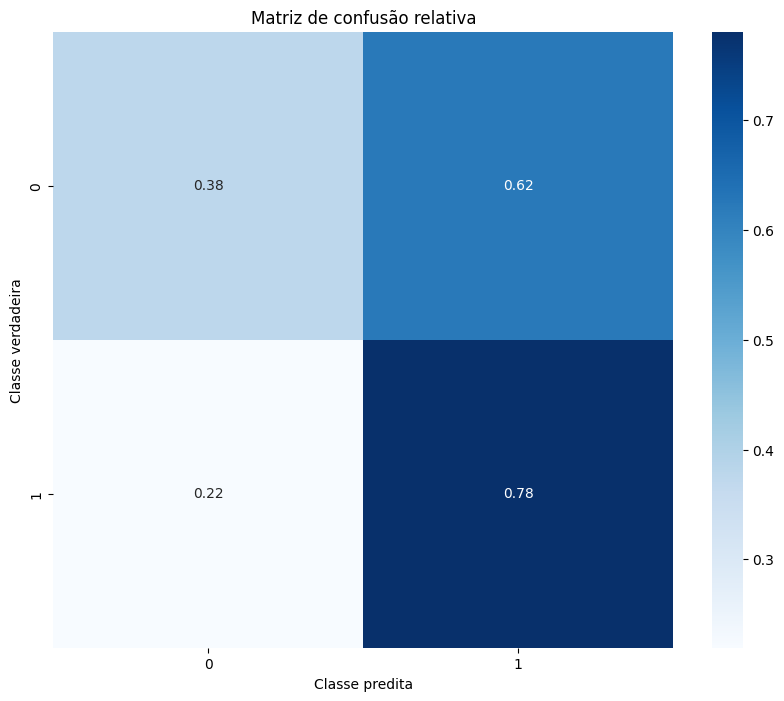

In [7]:
evaluate_metrics(y_val, p_val)